In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [21]:
ctr = [2,2,3,3,4,5,5,6,4,8,6,6,9,11,12,12,15,16,20,25,27]
drug = [2,3,2,3,4,3,3,4,5,5,6,6,8,7,6,7,8,11,10,11,15]

week = []
for x in range(1,8): #weeks 1-7
    week += [x,x,x]
week += week

vals = ctr + drug

labels = ['Control']*21 + ['Drug_z']*21

df = pd.DataFrame(zip(vals, week, labels), columns = ['Tumor size', 'Week', 'Treatment'])
df.head()

,Tumor size,Week,Treatment
0,2,1,Control
1,2,1,Control
2,3,1,Control
3,3,2,Control
4,4,2,Control


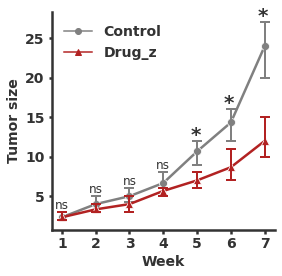

In [50]:
plt.figure(figsize = (4,4))

err_kws = {'capsize': 5, 'capthick': 2, 'elinewidth':2}

ax = sns.lineplot(data = df, x = 'Week', y = 'Tumor size', hue = 'Treatment', lw = 2.5,
                 style = 'Treatment', markers = ['o', '^'], dashes = False, markersize = 8 ,
                 err_style = 'bars', err_kws = err_kws, palette = ['gray', 'firebrick'])


for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(2.5)
    ax.spines[axis].set_color('0.2')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(width = 2.5, color = '0.2')

plt.xticks(size = 14, weight = 'bold', color = '0.2')
plt.yticks(size = 14, weight = 'bold', color = '0.2')

ax.set_xlabel(ax.get_xlabel(), fontsize = 14, weight = 'bold', color = '0.2')
ax.set_ylabel(ax.get_ylabel(), fontsize = 14, weight = 'bold', color = '0.2')

plt.legend(frameon = False, prop = {'weight':'bold', 'size':14}, labelcolor = '0.2')


for week in range(1,8):
    z = df[(df.Week == week) & (df.Treatment == 'Drug_z')]['Tumor size'].values
    c = df[(df.Week == week) & (df.Treatment == 'Control')]['Tumor size'].values
    
    p = stats.ttest_ind(z,c).pvalue
    
    max_v = df[df.Week == week]['Tumor size'].max()
    
    if p < 0.05:
        plt.text(x = week- 0.05, y = max_v - 0.5, s = "*",
                 fontsize = 20, ha = 'center', va = 'bottom', color = '0.2', weight = 'bold')
    else:
        plt.text(x = week, y = max_v, s = "ns", fontsize = 12, ha = 'center', va = 'bottom', color = '0.2')




plt.savefig('line_test.png', bbox_inches = 'tight', dpi = 250, facecolor = ax.get_facecolor())

In [45]:
for week in range(1,8):
    z = df[(df.Week == week) & (df.Treatment == 'Drug_z')]['Tumor size'].values
    c = df[(df.Week == week) & (df.Treatment == 'Control')]['Tumor size'].values
    
    p = stats.ttest_ind(z,c).pvalue
    
    max_v = df[df.Week == week]['Tumor size'].max()
    
    if p < 0.05:
        plt.text(x = week, y = max_v, s = "*", fontsize = 20, ha = 'center', va = 'bottom')
    else:
        plt.text(x = week, y = max_v, s = "ns", fontsize = 14, ha = 'center', va = 'bottom')

In [46]:
s

Ttest_indResult(statistic=-4.6475800154489, pvalue=0.009678951648207292)